In [35]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from keras.models import Sequential
import numpy as np
from selenium import webdriver

In [19]:
def PosterToArray(image):
    poster = np.array(image)
    poster = poster.astype('float32') / 255
    return poster

In [20]:
def modelInit():
    model = Sequential()
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(100, 100, 3)))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2), padding='same'))
    model.add(Flatten())
    model.add(Dropout(0.2))
    model.add(Dense(2, activation="softmax"))
    model.compile(optimizer='adam', loss='CategoricalCrossentropy', metrics=["accuracy"])
    return model

In [21]:
def PredictByModel(ourGenre, posterArray, model):

    checkpoint_path = f"Weights/{ourGenre}/cp.ckpt"

    model.load_weights(checkpoint_path).expect_partial()
    
    predicted = model.predict(posterArray)
    return (predicted[0], ourGenre)
    
    

In [22]:
def PredictAllModes(posterPath, model):
    poster = Image.open(posterPath)
    poster = poster.resize((100,100))
    numPyPoster = PosterToArray(poster)
    posterArray = [numPyPoster]
    posterArray = np.array(posterArray) 
    
    for i in range(len(Genres)):
        allPredictions.append(PredictByModel(Genres[i], posterArray, model))


In [23]:
def ThreeGenres():
    tempSort = []
    
    for i in range(len(allPredictions)):
        temp = [allPredictions[i][0][1] , allPredictions[i][1]]
        tempSort.append(temp)
    tempSort.sort()
    tempSort.reverse()
    print(f"Genre1: {tempSort[0][1]} ({np.round((tempSort[0][0] * 100),2)}%)    Genre2: {tempSort[1][1]} ({np.round(tempSort[1][0] * 100,2)}%)    Genre3: {tempSort[2][1]}({np.round(tempSort[2][0] * 100,2)}%)")
    recommendedGenres.append(tempSort[0][1])
    recommendedGenres.append(tempSort[1][1])
    recommendedGenres.append(tempSort[2][1])
    

In [28]:
Genres = ['Action', 'Adventure', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'Horror', 'Music', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller']
posterPath = "TestImages/test8.jpg"
recommendedGenres = []
allPredictions = []
model = modelInit()
PredictAllModes(posterPath, model)
ThreeGenres()

Genre1: Action (99.95%)    Genre2: Biography (92.52%)    Genre3: Sci-Fi(90.26%)


In [26]:
# for debugging
# allPredictions


Genre1: Action (99.95%)    Genre2: Biography (92.52%)    Genre3: Sci-Fi(90.26%)


In [27]:
recommendedGenres

['Action', 'Biography', 'Sci-Fi']

In [29]:
URLrecommend = f"https://www.imdb.com/search/title/?genres={recommendedGenres[0]},{recommendedGenres[1]},{recommendedGenres[2]}&explore=title_type,genres"

In [30]:
chromeDriverPATH = "C:\Program Files (x86)\chromedriver.exe"
driver = webdriver.Chrome(chromeDriverPATH)
driver.get(URLrecommend)
# driver.save_screenshot('image.png')
S = lambda X: driver.execute_script('return document.body.parentNode.scroll'+X)
driver.set_window_size(S('Width'),S('Height')) # May need manual adjustment                                                                                                                
driver.find_element_by_tag_name('body').screenshot('recommendedMovies.jpg')
driver.quit()

C:\Users\amrme\AppData\Local\Temp/ipykernel_18180/1881431956.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(chromeDriverPATH)
C:\Users\amrme\AppData\Local\Temp/ipykernel_18180/1881431956.py:7: DeprecationWarning: find_element_by_* commands are deprecated. Please use find_element() instead
  driver.find_element_by_tag_name('body').screenshot('recommendedMovies.jpg')
C:\Users\amrme\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\selenium\webdriver\remote\webelement.py:660: UserWarning: name used for saved screenshot does not match file type. It should end with a `.png` extension
  warnings.warn("name used for saved screenshot does not match file "


In [39]:
 
# Opens a image in RGB mode
im = Image.open("recommendedMovies.jpg")
 
# Size of the image in pixels (size of original image)
# (This is not mandatory)
width, height = im.size
 
# Setting the points for cropped image
left = 5
top = height / 4
right = 164
bottom = 3 * height / 4
 
# Cropped image of above dimension
# (It will not change original image)
im1 = im.crop((left, top, right, bottom))

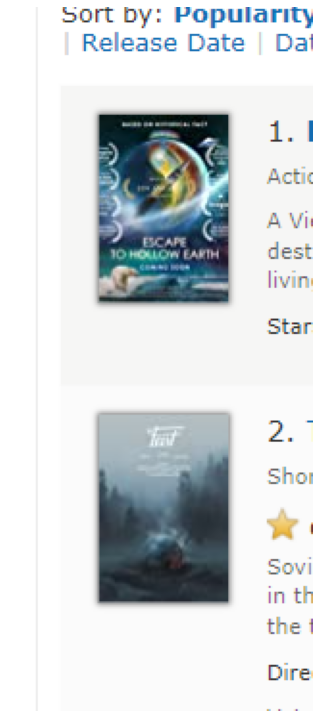

In [41]:
plt.figure(figsize=(100, 20))
# original
plt.subplot(2, 10, 1)
# plt.figure(figsize = (15,2))
plt.imshow(im1)
plt.gray()
plt.axis('off')
plt.tight_layout()
plt.show()